# **Walter Ed.**
# **Data Cleaning for AtliQ Mart_Supply Chain Improvement Project**

## Purpose of the Notebook

This notebook cleans the data to prepare it for analysis, ensuring the dataset is accurate, complete, and ready for the next steps.

## Data Overview
### 1. "dim_customers" DataFrame
**Key Details**: This dataset contains all the information about customers. There are 35 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
customer_id|Unique ID is given to each customer
customer_name|Name of the customer
city|It is the city where the customer is present

### 2. "dim_products" DataFrame
**Key Details**: This dataset contains all the information about the products. There are 18 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
product_name|It is the name of the product
product_id|Unique ID is given to each of the products
category|It is the class to which the product belongs

### 3. "dim_targets_orders" DataFrame
**Key Details**: This dataset contains all target data at the customer level. There are 35 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
customer_id|Unique ID that is given to each of the customers
ontime_target %|Target assigned for Ontime % for a given customer
infull_target %|Target assigned for infull % for a given customer
otif_target %|Target assigned for otif % for a given customer

### 4. "dim_date" DataFrame
**Key Details**: This dataset contains the dates at daily, monthly level and week numbers of the year. There are 183 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|date at the daily level
mmm_yy|date at the monthly level
week_no|week number of the year as per the date column

### 5. "fact_order_lines" DataFrame
**Key Details**: This dataset contains information about OnTime, InFull and OnTime InFull information aggregated at the order level per customer. There are 31729 rows, 6 columns, and these variables: 

Variable    |   Description| 
-----|-----|
order_id|Unique ID for each order the customer placed
customer_id|Unique ID that is given to each of the customers
order_placement_date|It is the date when the customer placed the order
on_time|'1' denotes the order is delviered on time. '0' denotes the order is not delivered on time.
in_full|'1' denotes the order is delviered in full quantity. '0' denotes the order is not delivered in full quantity.
otif|'1' denotes the order is delviered both on time and in full quantity. '0' denotes the order is either not delivered on time or not in full quantity.

### 6. "fact_orders_aggregate" DataFrame
**Key Details**: This dataset contains all information about orders and each item inside the orders. There are 57096 rows, 8 columns, and these variables: 

Variable    |   Description| 
-----|-----|
order_id|Unique ID for each order the customer placed
order_placement_date|It is the date when the customer placed the order
customer_id|Unique ID that is given to each of the customers
product_id|Unique ID that is given to each of the products
order_qty|It is the number of products requested by the customer to be delivered
agreed_delivery_date|It is the date agreed between the customer and Atliq Mart to deliver the products
actual_delivery_date|It is the actual date Atliq Mart delivered the product to the customer
delivered_qty|It is the number of products that are actually delivered to the customer

## Key Steps in the Data Cleaning Process

1. Gather basic information about the data
2. Rename columns:
    - Standardize column names to snake_case format, correcting any that do not follow the convention.
3. Gather descriptive statistics about the data
4. Check Data Types
Check data types and convert them to the correct format if necessary.
5.	Clean Text Data
    - Remove spaces at the beginning and end of the string
    - Convert text to lowcase or uppercase, optional.
6. Check Primary Key Columns
    - Verify the integrity of primary keys to ensure uniqueness and prevent duplicates.
7. Check Missing Values
    - Check for null values and handle them appropriately.
8. Check Duplicate Values
    - Check for duplicate records and remove them if necessary.
9. Check Unique Values
10. Check Foreign Key Columns
    - Check for foreign key integrity to ensure proper relationships between tables.
11.	Check for Outliers
    - Check for outliers and handle them appropriately.
12. Data Validity Check
    - Check the validity of the data to ensure it meets business rules and expected logic.
13.	Sorting data

## Expected Outcome

Upon completion, the data will be in a consistent format, with no missing values or outliers, and ready for in-depth analysis.

> **Note**: Detailed steps and explanations for the code are provided below.


## Step 1. Imports

*   Import packages
*   Load dataset

### Import Packages

In [1]:
# Import packages
## For data manipulation
import numpy as np
import pandas as pd
## For date and time manipulation
import datetime as dt
## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For displaying all of the columns in DataFrames
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Import dim_customer
dim_customers = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/dim_customers.csv")
# Import dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/dim_date.csv")
# Import dim_products
dim_products = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/dim_products.csv")
# Import dim_targets_orders
dim_targets_orders = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/dim_targets_orders.csv")
# Import fact_order_lines
fact_order_lines = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/fact_order_lines.csv")
# Import fact_orders_aggregate
fact_orders_aggregate = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/raw/fact_orders_aggregate.csv")

## Step 2. Data Exploration (Initial EDA and Data Cleaning)

- Understand dataset and variables
- Data Cleaning (Data Normalization)

### "dim_customers" DataFrame
This [dataset](link_git_hub) contains all the information about customers. There are 35 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
customer_id|Unique ID is given to each customer
customer_name|Name of the customer
city|It is the city where the customer is present

#### Gather Basic Information About The Data

In [3]:
# gather basic information about the data
dim_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


In [4]:
# top records
dim_customers.head(1)

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat


In [5]:
# last records
dim_customers.tail(1)

,customer_id,customer_name,city
34,789903,Elite Mart,Vadodara


#### Rename Columns

In [6]:
# display all column names
dim_customers.columns

Index(['customer_id', 'customer_name', 'city'], dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [7]:
# gather descriptive statistics about the data
dim_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,35.0,789427.857143,226.713105,789101.0,789220.5,789420.0,789602.0,789903.0


#### Check Data Types

In [8]:
# check for datatypes
dim_customers.dtypes

customer_id       int64
customer_name    object
city             object
dtype: object

**Comment:**
All data types are correct; no modifications needed.

#### Clean Text Data

In [9]:
# list of text columns to clean
customer_text_list = dim_customers.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_customers[customer_text_list] = dim_customers[customer_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_customers[customer_text_list] = dim_customers[customer_text_list].apply(lambda x: x.str.lower())

#### Check Primary Key Columns

In [10]:
# check the number of null values in the key identifier column
print(f"The number of null values in the Key Identifier column is {dim_customers['customer_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the Key Identifier column is {dim_customers['customer_id'].duplicated().sum()}")
# Check the unique values in the Key Identifier column
print(f"The number of unique values in the Key Identifier column is {dim_customers['customer_id'].unique().shape[0]}")
print(f"{dim_customers['customer_id'].unique()}")

The number of null values in the Key Identifier column is 0
The number of duplicated values in the Key Identifier column is 0
The number of unique values in the Key Identifier column is 35
[789201 789202 789203 789301 789303 789101 789102 789103 789121 789122
 789220 789221 789320 789321 789401 789402 789403 789420 789421 789422
 789501 789503 789520 789521 789522 789601 789603 789702 789703 789621
 789622 789720 789721 789902 789903]


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [11]:
# check for missing values
dim_customers.isnull().sum()

customer_id      0
customer_name    0
city             0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [12]:
# check for duplicates values
dim_customers.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [13]:
# check for unique values
dim_customers.nunique()

customer_id      35
customer_name    15
city              3
dtype: int64

In [14]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_customers['customer_name'].unique().shape[0]}")
print(f"{dim_customers['customer_name'].unique()}")

The number of unique values in the column is 15
['rel fresh' 'expression stores' 'vijay stores' 'coolblue' 'atlas stores'
 'chiptec stores' 'propel mart' 'lotus mart' 'viveks stores'
 'acclaimed stores' 'info stores' 'sorefoz mart' 'expert mart'
 'logic stores' 'elite mart']


In [15]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_customers['city'].unique().shape[0]}")
print(f"{dim_customers['city'].unique()}")

The number of unique values in the column is 3
['surat' 'ahmedabad' 'vadodara']


#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [16]:
# Sort the DataFrame by the specified column
dim_customers = dim_customers.sort_values(by=['customer_id'], ascending=True).reset_index(drop=True)

### "dim_products" DataFrame
This [dataset](link_git_hub) contains all the information about the products. There are 18 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
product_name|It is the name of the product
product_id|Unique ID is given to each of the products
category|It is the class to which the product belongs

#### Gather Basic Information About The Data

In [17]:
# gather basic information about the data
dim_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  18 non-null     object
 1   product_id    18 non-null     int64 
 2   category      18 non-null     object
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes


In [18]:
# top records
dim_products.head(1)

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy


In [19]:
# last records
dim_products.tail(1)

,product_name,product_id,category
17,AM Tea 100,25891603,Beverages


#### Rename Columns

In [20]:
# display all column names
dim_products.columns

Index(['product_name', 'product_id', 'category'], dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [21]:
# gather descriptive statistics about the data
dim_products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,18.0,25891352.0,175.735764,25891101.0,25891202.25,25891352.0,25891501.75,25891603.0


#### Check Data Types

In [22]:
# check for datatypes
dim_products.dtypes

product_name    object
product_id       int64
category        object
dtype: object

**Comment:**
All data types are correct; no modifications needed.

#### Clean Text Data

In [23]:
# list of text columns to clean
product_text_list = dim_products.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_products[product_text_list] = dim_products[product_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_products[product_text_list] = dim_products[product_text_list].apply(lambda x: x.str.lower())

#### Check Primary Key Columns

In [24]:
# check the number of null values in the key identifier column
print(f"The number of null values in the Key Identifier column is {dim_products['product_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the Key Identifier column is {dim_products['product_id'].duplicated().sum()}")
# Check the unique values in the Key Identifier column
print(f"The number of unique values in the Key Identifier column is {dim_products['product_id'].unique().shape[0]}")
print(f"{dim_products['product_id'].unique()}")

The number of null values in the Key Identifier column is 0
The number of duplicated values in the Key Identifier column is 0
The number of unique values in the Key Identifier column is 18
[25891101 25891102 25891103 25891201 25891202 25891203 25891301 25891302
 25891303 25891401 25891402 25891403 25891501 25891502 25891503 25891601
 25891602 25891603]


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [25]:
# check for missing values
dim_products.isnull().sum()

product_name    0
product_id      0
category        0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [26]:
# check for duplicates values
dim_products.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [27]:
# check for unique values
dim_products.nunique()

product_name    18
product_id      18
category         3
dtype: int64

In [28]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_products['product_name'].unique().shape[0]}")
print(f"{dim_products['product_name'].unique()}")

The number of unique values in the column is 18
['am milk 500' 'am milk 250' 'am milk 100' 'am butter 100' 'am butter 250'
 'am butter 500' 'am ghee 250' 'am ghee 150' 'am ghee 100' 'am curd 250'
 'am curd 100' 'am curd 50' 'am biscuits 750' 'am biscuits 500'
 'am biscuits 250' 'am tea 500' 'am tea 250' 'am tea 100']


In [29]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_products['category'].unique().shape[0]}")
print(f"{dim_products['category'].unique()}")

The number of unique values in the column is 3
['dairy' 'food' 'beverages']


#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [30]:
# Sort the DataFrame by the specified column
dim_products = dim_products.sort_values(by=['product_id'], ascending=True).reset_index(drop=True)

### "dim_targets_orders" DataFrame
This [dataset](link_git_hub) contains all target data at the customer level. There are 35 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
customer_id|Unique ID that is given to each of the customers
ontime_target %|Target assigned for Ontime % for a given customer
infull_target %|Target assigned for infull % for a given customer
otif_target %|Target assigned for otif % for a given customer

#### Gather Basic Information About The Data

In [31]:
# gather basic information about the data
dim_targets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [32]:
# top records
dim_targets_orders.head(1)

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70


In [33]:
# last records
dim_targets_orders.tail(1)

,customer_id,ontime_target%,infull_target%,otif_target%
34,789903,92,65,60


#### Rename Columns

In [34]:
# display all column names
dim_targets_orders.columns

Index(['customer_id', 'ontime_target%', 'infull_target%', 'otif_target%'], dtype='object')

In [35]:
# Rename columns as needed
dim_targets_orders.rename(columns={
    'ontime_target%':'ot_target_pct',
    'infull_target%':'if_target_pct',
    'otif_target%':'otif_target_pct',
}, inplace=True)
# Display all column names after the update
dim_targets_orders.columns

Index(['customer_id', 'ot_target_pct', 'if_target_pct', 'otif_target_pct'], dtype='object')

#### Gather Descriptive Statistics About The Data

In [36]:
# gather descriptive statistics about the data
dim_targets_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,35.0,789427.857143,226.713105,789101.0,789220.5,789420.0,789602.0,789903.0
ot_target_pct,35.0,86.085714,5.632737,75.0,85.0,87.0,90.5,92.0
if_target_pct,35.0,76.514286,5.500649,65.0,75.5,79.0,80.5,82.0
otif_target_pct,35.0,65.914286,6.621584,49.0,62.0,68.0,70.0,75.0


#### Check Data Types

In [37]:
# check for datatypes
dim_targets_orders.dtypes

customer_id        int64
ot_target_pct      int64
if_target_pct      int64
otif_target_pct    int64
dtype: object

**Comment:**
All data types are correct; no modifications needed.

#### Check Primary Key Columns

In [38]:
# check the number of null values in the key identifier column
print(f"The number of null values in the Key Identifier column is {dim_targets_orders['customer_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the Key Identifier column is {dim_targets_orders['customer_id'].duplicated().sum()}")
# Check the unique values in the Key Identifier column
print(f"The number of unique values in the Key Identifier column is {dim_targets_orders['customer_id'].unique().shape[0]}")
print(f"{dim_targets_orders['customer_id'].unique()}")

The number of null values in the Key Identifier column is 0
The number of duplicated values in the Key Identifier column is 0
The number of unique values in the Key Identifier column is 35
[789201 789202 789203 789301 789303 789101 789102 789103 789121 789122
 789220 789221 789320 789321 789401 789402 789403 789420 789421 789422
 789501 789503 789520 789521 789522 789601 789603 789702 789703 789621
 789622 789720 789721 789902 789903]


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [39]:
# check for missing values
dim_targets_orders.isnull().sum()

customer_id        0
ot_target_pct      0
if_target_pct      0
otif_target_pct    0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [40]:
# check for duplicates values
dim_targets_orders.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [41]:
# check for unique values
dim_targets_orders.nunique()

customer_id        35
ot_target_pct      12
if_target_pct      12
otif_target_pct    15
dtype: int64

In [42]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_targets_orders['ot_target_pct'].unique().shape[0]}")
print(f"{dim_targets_orders['ot_target_pct'].unique()}")

The number of unique values in the column is 12
[87 85 92 89 88 86 90 78 76 91 75 79]


In [43]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_targets_orders['if_target_pct'].unique().shape[0]}")
print(f"{dim_targets_orders['if_target_pct'].unique()}")

The number of unique values in the column is 12
[81 76 78 80 67 77 65 79 66 82 68 75]


In [44]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_targets_orders['otif_target_pct'].unique().shape[0]}")
print(f"{dim_targets_orders['otif_target_pct'].unique()}")

The number of unique values in the column is 15
[70 69 73 62 60 49 68 74 67 71 59 51 64 66 75]


#### Check Foreign Key Columns

In [45]:
# Find customer_id Present in One Table but Not in the Other
# customer_id in dim_customer but not in dim_targets_orders
only_dim_customer = set(dim_customers['customer_id']) - set(dim_targets_orders['customer_id'])
print(f"Number of unique customer IDs only in dim_customer: {len(only_dim_customer)}")
print(f"{only_dim_customer}")

# customer_id in dim_targets_orders but not in dim_customer
only_dim_targets_orders = set(dim_targets_orders['customer_id']) - set(dim_customers['customer_id'])
print(f"Number of unique customer IDs only in dim_targets_orders: {len(only_dim_targets_orders)}")
print(f"{only_dim_targets_orders}")

# Validate Data Completeness
## Compare the number of customers between the tables
print(f"Total customers in dim_customers: {dim_customers['customer_id'].count()}")
print(f"The number of unique customers in dim_customers: {dim_customers['customer_id'].unique()}")

print(f"Total customers in dim_targets_orders: {dim_targets_orders['customer_id'].count()}")
print(f"The number of unique customers in dim_targets_orders: {dim_targets_orders['customer_id'].unique()}")

Number of unique customer IDs only in dim_customer: 0
set()
Number of unique customer IDs only in dim_targets_orders: 0
set()
Total customers in dim_customers: 35
The number of unique customers in dim_customers: [789101 789102 789103 789121 789122 789201 789202 789203 789220 789221
 789301 789303 789320 789321 789401 789402 789403 789420 789421 789422
 789501 789503 789520 789521 789522 789601 789603 789621 789622 789702
 789703 789720 789721 789902 789903]
Total customers in dim_targets_orders: 35
The number of unique customers in dim_targets_orders: [789201 789202 789203 789301 789303 789101 789102 789103 789121 789122
 789220 789221 789320 789321 789401 789402 789403 789420 789421 789422
 789501 789503 789520 789521 789522 789601 789603 789702 789703 789621
 789622 789720 789721 789902 789903]


**Comment:**
All checks passed, data is valid and consistent.

#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [46]:
# Sort the DataFrame by the specified column
dim_targets_orders = dim_targets_orders.sort_values(by=['customer_id'], ascending=True).reset_index(drop=True)

### "dim_date" DataFrame
This [dataset](link_git_hub) contains the dates at daily, monthly level and week numbers of the year. There are 183 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|date at the daily level
mmm_yy|date at the monthly level
week_no|week number of the year as per the date column

#### Gather Basic Information About The Data

In [47]:
# gather basic information about the data
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     183 non-null    object
 1   mmm_yy   183 non-null    object
 2   week_no  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [48]:
# top records
dim_date.head(1)

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14


In [49]:
# last records
dim_date.tail(1)

,date,mmm_yy,week_no
182,31-May-22,01-May-22,W 23


#### Rename Columns

In [50]:
# display all column names
dim_date.columns

Index(['date', 'mmm_yy', 'week_no'], dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [51]:
# gather descriptive statistics about the data
dim_date.describe().T

,count,unique,top,freq
date,183,183,01-Apr-22,1
mmm_yy,183,6,01-Jul-22,31
week_no,183,27,W 14,7


#### Check Data Types

In [52]:
# check for datatypes
dim_date.dtypes

date       object
mmm_yy     object
week_no    object
dtype: object

In [53]:
# Transform Object Data Types to Date
dim_date['date'] = pd.to_datetime(dim_date['date'])

## Create a new column 'mmm-yy' based on the 'date' column
dim_date['mmm_yy'] = dim_date['date'].dt.strftime('%b-%y')  # Format to mmm-yy

C:\Users\PC\AppData\Local\Temp\ipykernel_9672\3238984166.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])


#### Clean Text Data

In [54]:
# list of text columns to clean
date_text_list = dim_date.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_date[date_text_list] = dim_date[date_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_date[date_text_list] = dim_date[date_text_list].apply(lambda x: x.str.lower())

# Replace spaces in 'week_no' with hyphens for consistency
dim_date['week_no'] = dim_date['week_no'].str.replace(' ', '-')

#### Check Missing Values

In [55]:
# check for missing values
dim_date.isnull().sum()

date       0
mmm_yy     0
week_no    0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [56]:
# check for duplicates values
dim_date.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [57]:
# check for unique values
dim_date.nunique()

date       183
mmm_yy       6
week_no     27
dtype: int64

In [58]:
# Define the start and end date range
print(f"the start date is {dim_date['date'].min()}")
print(f"the end date is {dim_date['date'].max()}")

# Create a list of all dates in the date range
all_dates = pd.date_range(start=dim_date['date'].min(), end=dim_date['date'].max())

# Get the list of existing dates in dim_date
existing_dates = dim_date['date'].unique()

# Find the missing dates
missing_dates = set(all_dates) - set(existing_dates)

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")

the start date is 2022-03-01 00:00:00
the end date is 2022-08-30 00:00:00
Missing dates: []


In [59]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_date['mmm_yy'].unique().shape[0]}")
print(f"{dim_date['mmm_yy'].unique()}")

The number of unique values in the column is 6
['apr-22' 'aug-22' 'jul-22' 'jun-22' 'mar-22' 'may-22']


In [60]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_date['week_no'].unique().shape[0]}")
print(f"{dim_date['week_no'].unique()}")

The number of unique values in the column is 27
['w-14' 'w-15' 'w-16' 'w-17' 'w-18' 'w-34' 'w-32' 'w-33' 'w-35' 'w-36'
 'w-29' 'w-27' 'w-28' 'w-30' 'w-31' 'w-23' 'w-24' 'w-25' 'w-26' 'w-12'
 'w-10' 'w-11' 'w-13' 'w-19' 'w-20' 'w-21' 'w-22']


#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [61]:
# Sort the DataFrame by the specified column
dim_date = dim_date.sort_values(by=['date'], ascending=True).reset_index(drop=True)

### "fact_orders_aggregate" DataFrame
This [dataset](link_git_hub) contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer. There are 31729 rows, 6 columns, and these variables: 

Variable    |   Description| 
-----|-----|
order_id|Unique ID for each order the customer placed
customer_id|Unique ID that is given to each of the customers
order_placement_date|It is the date when the customer placed the order
on_time|'1' denotes the order is delviered on time. '0' denotes the order is not delivered on time.
in_full|'1' denotes the order is delviered in full quantity. '0' denotes the order is not delivered in full quantity.
otif|'1' denotes the order is delviered both on time and in full quantity. '0' denotes the order is either not delivered on time or not in full quantity.

#### Gather Basic Information About The Data

In [62]:
# gather basic information about the data
fact_orders_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              31729 non-null  object
 1   customer_id           31729 non-null  int64 
 2   order_placement_date  31729 non-null  object
 3   on_time               31729 non-null  int64 
 4   in_full               31729 non-null  int64 
 5   otif                  31729 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [63]:
# top records
fact_orders_aggregate.head(1)

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0


In [64]:
# last records
fact_orders_aggregate.tail(1)

,order_id,customer_id,order_placement_date,on_time,in_full,otif
31728,FAUG831703602,789703,30-Aug-22,1,1,1


#### Rename Columns

In [65]:
# display all column names
fact_orders_aggregate.columns

Index(['order_id', 'customer_id', 'order_placement_date', 'on_time', 'in_full',
       'otif'],
      dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [66]:
# gather descriptive statistics about the data
fact_orders_aggregate.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,31729.0,789423.561285,219.103565,789101.0,789220.0,789420.0,789601.0,789903.0
on_time,31729.0,0.590312,0.491784,0.0,0.0,1.0,1.0,1.0
in_full,31729.0,0.527814,0.499234,0.0,0.0,1.0,1.0,1.0
otif,31729.0,0.290208,0.453865,0.0,0.0,0.0,1.0,1.0


#### Check Data Types

In [67]:
# check for datatypes
fact_orders_aggregate.dtypes

order_id                object
customer_id              int64
order_placement_date    object
on_time                  int64
in_full                  int64
otif                     int64
dtype: object

In [68]:
# Transform Object Data Types to Date
fact_orders_aggregate['order_placement_date'] = pd.to_datetime(fact_orders_aggregate['order_placement_date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_9672\2186241718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_orders_aggregate['order_placement_date'] = pd.to_datetime(fact_orders_aggregate['order_placement_date'])


#### Clean Text Data

In [69]:
# list of text columns to clean
aggregate_text_list = fact_orders_aggregate.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
fact_orders_aggregate[aggregate_text_list] = fact_orders_aggregate[aggregate_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
fact_orders_aggregate[aggregate_text_list] = fact_orders_aggregate[aggregate_text_list].apply(lambda x: x.str.lower())

#### Check Primary Key Columns

In [70]:
# check the number of null values in the key identifier column
print(f"The number of null values in the Key Identifier column is {fact_orders_aggregate['order_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the Key Identifier column is {fact_orders_aggregate['order_id'].duplicated().sum()}")
# Check the unique values in the Key Identifier column
print(f"The number of unique values in the Key Identifier column is {fact_orders_aggregate['order_id'].unique().shape[0]}")
print(f"{fact_orders_aggregate['order_id'].unique()}")

The number of null values in the Key Identifier column is 0
The number of duplicated values in the Key Identifier column is 0
The number of unique values in the Key Identifier column is 31729
['fmr32103503' 'fmr34103403' 'fmr32103602' ... 'faug831122203'
 'faug831303403' 'faug831703602']


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [71]:
# check for missing values
fact_orders_aggregate.isnull().sum()

order_id                0
customer_id             0
order_placement_date    0
on_time                 0
in_full                 0
otif                    0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [72]:
# check for duplicates values
fact_orders_aggregate.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [73]:
# check for unique values
fact_orders_aggregate.nunique()

order_id                31729
customer_id                35
order_placement_date      183
on_time                     2
in_full                     2
otif                        2
dtype: int64

In [74]:
# Define the start and end date range
print(f"the start date is {fact_orders_aggregate['order_placement_date'].min()}")
print(f"the end date is {fact_orders_aggregate['order_placement_date'].max()}")

# Find the missing dates
missing_dates = set(dim_date['date'].unique()) - set(fact_orders_aggregate['order_placement_date'].unique())

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")

the start date is 2022-03-01 00:00:00
the end date is 2022-08-30 00:00:00
Missing dates: []


In [75]:
# check unique values in the column
print(f"The number of unique values in the column is {fact_orders_aggregate['on_time'].unique().shape[0]}")
print(f"{fact_orders_aggregate['on_time'].unique()}")

The number of unique values in the column is 2
[1 0]


In [76]:
# check unique values in the column
print(f"The number of unique values in the column is {fact_orders_aggregate['in_full'].unique().shape[0]}")
print(f"{fact_orders_aggregate['in_full'].unique()}")

The number of unique values in the column is 2
[0 1]


In [77]:
# check unique values in the column
print(f"The number of unique values in the column is {fact_orders_aggregate['otif'].unique().shape[0]}")
print(f"{fact_orders_aggregate['otif'].unique()}")

The number of unique values in the column is 2
[0 1]


#### Check Foreign Key Columns

In [78]:
# Find customer_id Present in One Table but Not in the Other
# customer_id in dim_customer but not in fact_orders_aggregate
only_dim_customer = set(dim_customers['customer_id']) - set(fact_orders_aggregate['customer_id'])
print(f"Number of unique customer IDs only in dim_customer: {len(only_dim_customer)}")
print(f"{only_dim_customer}")

# customer_id in fact_orders_aggregate but not in dim_customer
only_fact_orders_aggregate = set(fact_orders_aggregate['customer_id']) - set(dim_customers['customer_id'])
print(f"Number of unique customer IDs only in fact_orders_aggregate: {len(only_fact_orders_aggregate)}")
print(f"{only_fact_orders_aggregate}")

# Validate Data Completeness
## Compare the number of customers between the tables
print(f"Total customers in dim_customers: {dim_customers['customer_id'].count()}")
print(f"The number of unique customers in dim_customers: {dim_customers['customer_id'].nunique()}")

print(f"Total customers in fact_orders_aggregate: {fact_orders_aggregate['customer_id'].count()}")
print(f"The number of unique customers in fact_orders_aggregate: {dim_customers['customer_id'].nunique()}")

Number of unique customer IDs only in dim_customer: 0
set()
Number of unique customer IDs only in fact_orders_aggregate: 0
set()
Total customers in dim_customers: 35
The number of unique customers in dim_customers: 35
Total customers in fact_orders_aggregate: 31729
The number of unique customers in fact_orders_aggregate: 35


**Comment:**
All checks passed, data is valid and consistent.

#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [79]:
# Sort the DataFrame by the specified column
fact_orders_aggregate = fact_orders_aggregate.sort_values(by=['order_placement_date','order_id'], ascending=True).reset_index(drop=True)

### "fact_order_lines" DataFrame
This [dataset](link_git_hub) contains all information about orders and each item inside the orders. There are 57096 rows, 8 columns, and these variables: 

Variable    |   Description| 
-----|-----|
order_id|Unique ID for each order the customer placed
order_placement_date|It is the date when the customer placed the order
customer_id|Unique ID that is given to each of the customers
product_id|Unique ID that is given to each of the products
order_qty|It is the number of products requested by the customer to be delivered
agreed_delivery_date|It is the date agreed between the customer and Atliq Mart to deliver the products
actual_delivery_date|It is the actual date Atliq Mart delivered the product to the customer
delivered_qty|It is the number of products that are actually delivered to the customer

#### Gather Basic Information About The Data

In [80]:
# gather basic information about the data
fact_order_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              57096 non-null  object
 1   order_placement_date  57096 non-null  object
 2   customer_id           57096 non-null  int64 
 3   product_id            57096 non-null  int64 
 4   order_qty             57096 non-null  int64 
 5   agreed_delivery_date  57096 non-null  object
 6   actual_delivery_date  57096 non-null  object
 7   delivery_qty          57096 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.5+ MB


In [81]:
# top records
fact_order_lines.head(1)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110


In [82]:
# last records
fact_order_lines.tail(1)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty
57095,FAUG831202303,"Tuesday, August 30, 2022",789202,25891303,29,"Wednesday, August 31, 2022","Thursday, September 1, 2022",29


#### Rename Columns

In [83]:
# display all column names
fact_order_lines.columns

Index(['order_id', 'order_placement_date', 'customer_id', 'product_id',
       'order_qty', 'agreed_delivery_date', 'actual_delivery_date',
       'delivery_qty'],
      dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [84]:
# gather descriptive statistics about the data
fact_order_lines.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,57096.0,7.894272e+05,224.254353,789101.0,789220.0,789420.0,789603.0,789903.0
product_id,57096.0,2.589135e+07,170.701793,25891101.0,25891202.0,25891303.0,25891502.0,25891603.0
order_qty,57096.0,2.351642e+02,141.001784,20.0,111.0,207.0,361.0,500.0
delivery_qty,57096.0,2.271465e+02,137.109465,16.0,106.0,200.0,347.0,500.0


#### Check Data Types

In [85]:
# check for datatypes
fact_order_lines.dtypes

order_id                object
order_placement_date    object
customer_id              int64
product_id               int64
order_qty                int64
agreed_delivery_date    object
actual_delivery_date    object
delivery_qty             int64
dtype: object

In [86]:
# Transform Object Data Types to Date
fact_order_lines[['order_placement_date', 'agreed_delivery_date', 'actual_delivery_date']] = fact_order_lines[['order_placement_date', 'agreed_delivery_date', 'actual_delivery_date']].apply(pd.to_datetime)

#### Clean Text Data

In [87]:
# list of text columns to clean
line_text_list = fact_order_lines.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
fact_order_lines[line_text_list] = fact_order_lines[line_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
fact_order_lines[line_text_list] = fact_order_lines[line_text_list].apply(lambda x: x.str.lower())

#### Check Missing Values

In [88]:
# check for missing values
fact_order_lines.isnull().sum()

order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [89]:
# check for duplicates values
fact_order_lines.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [90]:
# check for unique values
fact_order_lines.nunique()

order_id                31729
order_placement_date      183
customer_id                35
product_id                 18
order_qty                 481
agreed_delivery_date      183
actual_delivery_date      187
delivery_qty              485
dtype: int64

In [91]:
# Define the start and end date range
print(f"the start date is {fact_order_lines['order_placement_date'].min()}")
print(f"the end date is {fact_order_lines['order_placement_date'].max()}")

# Find the missing dates
missing_dates = set(dim_date['date'].unique()) - set(fact_order_lines['order_placement_date'].unique())
# Find the missing dates
missing_order_dates = set(fact_order_lines['order_placement_date'].unique()) - set(dim_date['date'].unique())

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Missing order placement date: {sorted(missing_order_dates)}")

the start date is 2022-03-01 00:00:00
the end date is 2022-08-30 00:00:00
Missing dates: []
Missing order placement date: []


In [92]:
# Define the start and end date range
print(f"the start date is {fact_order_lines['agreed_delivery_date'].min()}")
print(f"the end date is {fact_order_lines['agreed_delivery_date'].max()}")

# Find the missing dates
missing_dates = set(dim_date['date'].unique()) - set(fact_order_lines['agreed_delivery_date'].unique())
# Find the missing dates
missing_agreed_dates = set(fact_order_lines['agreed_delivery_date'].unique()) - set(dim_date['date'].unique())

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Missing agreed dates: {sorted(missing_agreed_dates)}")

the start date is 2022-03-02 00:00:00
the end date is 2022-08-31 00:00:00
Missing dates: [Timestamp('2022-03-01 00:00:00')]
Missing agreed dates: [Timestamp('2022-08-31 00:00:00')]


In [93]:
# Define the start and end date range
print(f"the start date is {fact_order_lines['actual_delivery_date'].min()}")
print(f"the end date is {fact_order_lines['actual_delivery_date'].max()}")

# Find the missing dates
missing_dates = set(dim_date['date'].unique()) - set(fact_order_lines['actual_delivery_date'].unique())
# Find the missing dates
missing_actual_dates = set(fact_order_lines['actual_delivery_date'].unique()) - set(dim_date['date'].unique())

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Missing actual dates: {sorted(missing_actual_dates)}")

the start date is 2022-03-01 00:00:00
the end date is 2022-09-03 00:00:00
Missing dates: []
Missing actual dates: [Timestamp('2022-08-31 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-09-02 00:00:00'), Timestamp('2022-09-03 00:00:00')]


#### Check Foreign Key Columns

In [94]:
# Find order_id Present in One Table but Not in the Other
# order_id in fact_orders_aggregate but not in fact_order_lines
only_fact_orders_aggregate = set(fact_orders_aggregate['order_id']) - set(fact_order_lines['order_id'])
print(f"Number of unique order IDs only in fact_orders_aggregate: {len(only_fact_orders_aggregate)}")
print(f"{only_fact_orders_aggregate}")

# order_id in fact_order_lines but not in fact_orders_aggregate
only_fact_order_lines = set(fact_order_lines['order_id']) - set(fact_orders_aggregate['order_id'])
print(f"Number of unique order IDs only in fact_order_lines: {len(only_fact_order_lines)}")
print(f"{only_fact_order_lines}")

# Validate Data Completeness
## Compare the number of customers between the tables
print(f"Total order in fact_orders_aggregate: {fact_orders_aggregate['order_id'].count()}")
print(f"The number of unique order in fact_orders_aggregate: {fact_orders_aggregate['order_id'].nunique()}")

print(f"Total order in fact_order_lines: {fact_order_lines['order_id'].count()}")
print(f"The number of unique order in fact_order_lines: {fact_order_lines['order_id'].nunique()}")

Number of unique order IDs only in fact_orders_aggregate: 0
set()
Number of unique order IDs only in fact_order_lines: 0
set()
Total order in fact_orders_aggregate: 31729
The number of unique order in fact_orders_aggregate: 31729
Total order in fact_order_lines: 57096
The number of unique order in fact_order_lines: 31729


In [95]:
# Find customer_id Present in One Table but Not in the Other
# customer_id in dim_customer but not in fact_order_lines
only_dim_customer = set(dim_customers['customer_id']) - set(fact_order_lines['customer_id'])
print(f"Number of unique customer IDs only in dim_customer: {len(only_dim_customer)}")
print(f"{only_dim_customer}")

# customer_id in fact_orders_aggregate but not in dim_customer
only_fact_order_lines = set(fact_order_lines['customer_id']) - set(dim_customers['customer_id'])
print(f"Number of unique customer IDs only in fact_order_lines: {len(only_fact_order_lines)}")
print(f"{only_fact_order_lines}")

# Validate Data Completeness
## Compare the number of customers between the tables
print(f"Total customers in dim_customers: {dim_customers['customer_id'].count()}")
print(f"The number of unique customers in dim_customers: {dim_customers['customer_id'].nunique()}")

print(f"Total customers in fact_order_lines: {fact_order_lines['customer_id'].count()}")
print(f"The number of unique customers in fact_order_lines: {fact_order_lines['customer_id'].nunique()}")

Number of unique customer IDs only in dim_customer: 0
set()
Number of unique customer IDs only in fact_order_lines: 0
set()
Total customers in dim_customers: 35
The number of unique customers in dim_customers: 35
Total customers in fact_order_lines: 57096
The number of unique customers in fact_order_lines: 35


In [96]:
# Find product_id Present in One Table but Not in the Other
# product_id in dim_products but not in fact_order_lines
only_dim_products = set(dim_products['product_id']) - set(fact_order_lines['product_id'])
print(f"Number of unique product IDs only in dim_products: {len(only_dim_products)}")
print(f"{only_dim_products}")

# product_id in fact_order_lines but not in dim_products
only_fact_order_lines = set(fact_order_lines['product_id']) - set(dim_products['product_id'])
print(f"Number of unique product IDs only in fact_order_lines: {len(only_fact_order_lines)}")
print(f"{only_fact_order_lines}")

# Validate Data Completeness
## Compare the number of customers between the tables
print(f"Total product in dim_products: {dim_products['product_id'].count()}")
print(f"The number of unique product in dim_products: {dim_products['product_id'].nunique()}")

print(f"Total product in fact_order_lines: {fact_order_lines['product_id'].count()}")
print(f"The number of unique product in fact_order_lines: {fact_order_lines['product_id'].nunique()}")

Number of unique product IDs only in dim_products: 0
set()
Number of unique product IDs only in fact_order_lines: 0
set()
Total product in dim_products: 18
The number of unique product in dim_products: 18
Total product in fact_order_lines: 57096
The number of unique product in fact_order_lines: 18


#### Outlier Detection

In [97]:
# determine the number of rows containing outliers
def check_outlier(df, column):
    """
    Check and identify outliers in a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be checked.
        column (str): The name of the column in the DataFrame to check for outliers.

    Returns:
        pd.DataFrame: A DataFrame containing statistical indices, including:
            - lower_bound (float): The lower limit to identify outliers.
            - upper_bound (float): The upper limit to identify outliers.
            - total_outliers (int): The total number of outlier values in the column.
            - percent_outliers (float): The percentage of outlier values in the column.

    Notes:
        Outliers are identified based on the inter-quartile range (IQR) of the data.
        Values falling outside the lower and upper thresholds are considered outliers.
    """

    # Compute the 25th percentile values
    Q1 = df[column].quantile(0.25)
    # Compute the 75th percentile values
    Q3 = df[column].quantile(0.75)
    # Compute the inter-quartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper thresholds to identify outliers
    lower_limit = Q1 - 1.5 * IQR # Lower threshold
    upper_limit = Q3 + 1.5 * IQR # Upper threshold

    # Calculate the total row of data
    total_row = df.shape[0]
    # Calculate the total number of outliers
    total_outlier = (df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])
    # Calculate the percentage of outliers
    percent_outlier = round(((df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])) / df.shape[0] * 100, 2)
    
    # Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower_limit],
        'upper_bound': [upper_limit],
        'total_row': [total_row],
        'outlier_row':[total_outlier],
        'outliers_pct': [percent_outlier]
    })

    # returns the calculated values
    return result

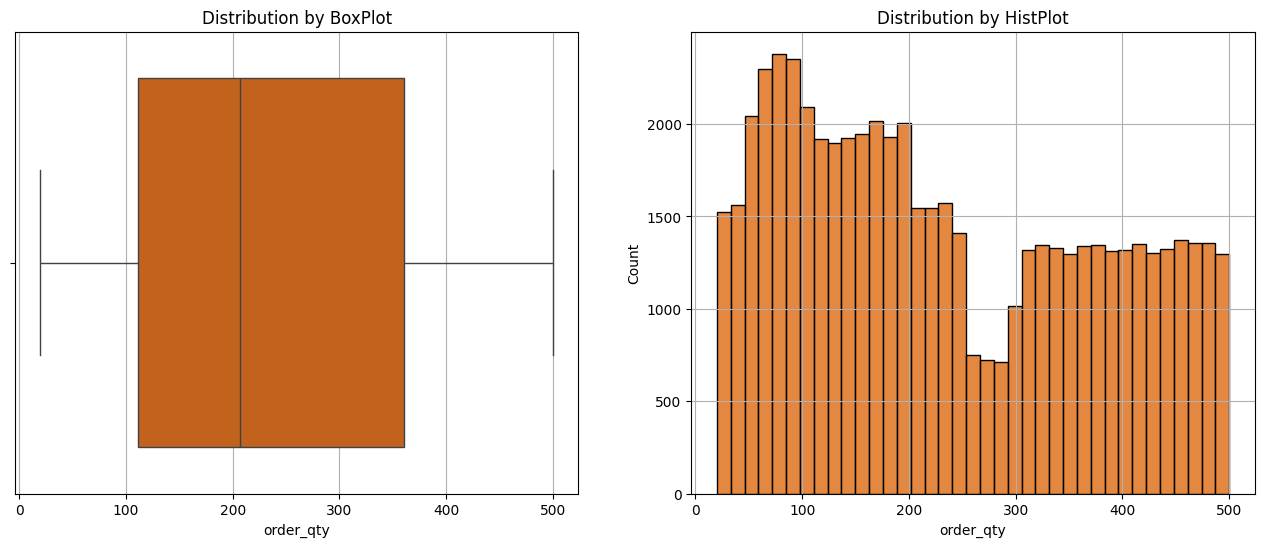

The Skew of Sold Quantity Data is: 0.3


In [98]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=fact_order_lines, x='order_qty', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=fact_order_lines, x='order_qty', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Sold Quantity Data is: {round(fact_order_lines['order_qty'].skew(), 2)}")

**Comment:**
The data shows a skew of 0.3, indicating a slightly skewed but acceptable distribution. No significant outliers were detected, so the data is considered suitable for further analysis.

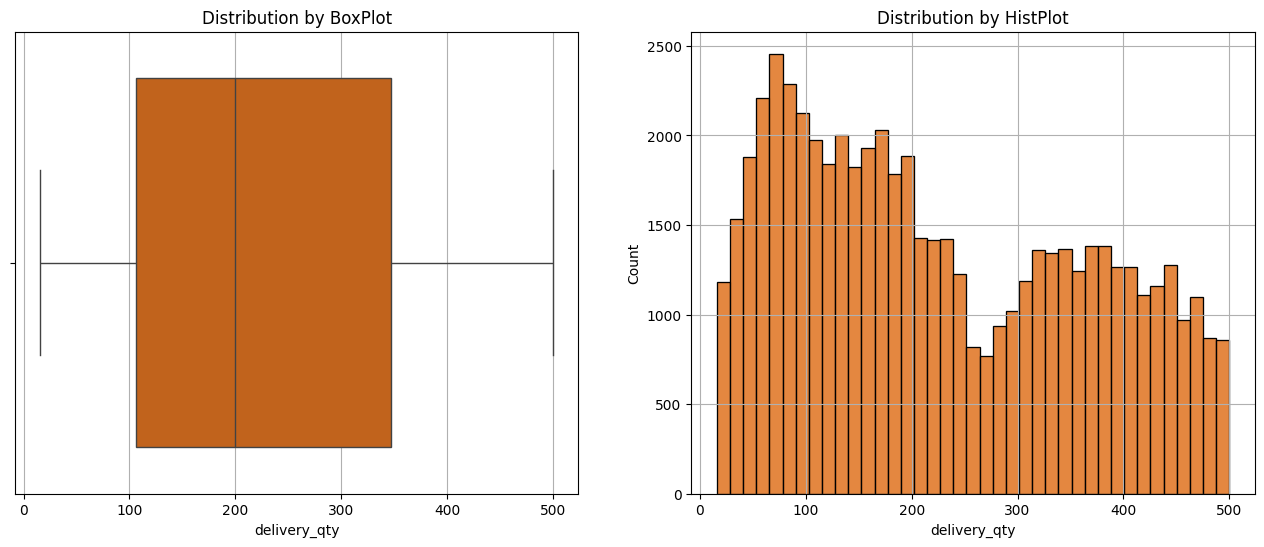

The Skew of Sold Quantity Data is: 0.3


In [99]:
# Create a BoxPlot and HistPlot to visualize distribution of 'ev_sold' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=fact_order_lines, x='delivery_qty', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=fact_order_lines, x='delivery_qty', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Sold Quantity Data is: {round(fact_order_lines['order_qty'].skew(), 2)}")

**Comment:**
The data shows a skew of 0.3, indicating a slightly skewed but acceptable distribution. No significant outliers were detected, so the data is considered suitable for further analysis.

#### Data Validity Check: Delivery Quantities

In [100]:
# Filter orders where ordered quantity matches delivered quantity. This helps identify orders that have been delivered in full
full_delivery = fact_order_lines[fact_order_lines['order_qty'] == fact_order_lines['delivery_qty']]
# print the number of orders with delivered in full
print(f"Number of order with delivered in full is {full_delivery.shape[0]}, percentage: {round(full_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%")

# Filter orders where ordered quantity does not match delivered quantity. This helps identify orders that have discrepancies in delivery
not_full_delivery = fact_order_lines[fact_order_lines['order_qty'] != fact_order_lines['delivery_qty']]
# Print the number of orders with discrepancies in delivery
print(f"Number of orders with discrepancies in delivery is {not_full_delivery.shape[0]}, percentage: {round(not_full_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%")

Number of order with delivered in full is 37661, percentage: 65.96%
Number of orders with discrepancies in delivery is 19435, percentage: 34.04%


In [101]:
# Filter orders where delivery_qty is greater than order_qty
over_qty = not_full_delivery[not_full_delivery['delivery_qty'] > not_full_delivery['order_qty']]
# print the number of orders with delivery_qty is greater than order_qty
print(f"Number of order with delivery_qty is greater than order_qty: {over_qty.shape[0]}")
# Calculate the percentage of these orders
print(f'Percentage of orders over-delivered (delivery_qty > order_qty): {round(over_qty.shape[0] / fact_order_lines.shape[0],2)}%')

Number of order with delivery_qty is greater than order_qty: 0
Percentage of orders over-delivered (delivery_qty > order_qty): 0.0%


In [102]:
# Filter orders where delivery_qty is less than order_qty
under_qty = not_full_delivery[not_full_delivery['delivery_qty'] < not_full_delivery['order_qty']]
# print the number of orders with delivery_qty is less than order_qty
print(f"Number of order with delivery_qty is less than order_qty: {under_qty.shape[0]}")
# Calculate the percentage of these orders
print(f'Percentage of orders under-delivered (delivery_qty < order_qty): {round(under_qty.shape[0] / fact_order_lines.shape[0] * 100,2)}%')

Number of order with delivery_qty is less than order_qty: 19435
Percentage of orders under-delivered (delivery_qty < order_qty): 34.04%


In [103]:
# Calculate the difference between order_qty and delivery_qty
not_full_delivery['difference_qty'] = not_full_delivery['order_qty'] - not_full_delivery['delivery_qty']
# find the minimum difference
print(f"The minimum quantity difference is {not_full_delivery['difference_qty'].min()}")
# find the maximum difference
print(f"The maximum quantity difference is {not_full_delivery['difference_qty'].max()}")

The minimum quantity difference is 1
The maximum quantity difference is 100


C:\Users\PC\AppData\Local\Temp\ipykernel_9672\796531141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_full_delivery['difference_qty'] = not_full_delivery['order_qty'] - not_full_delivery['delivery_qty']


In [104]:
# Create the 'in_full' column using a lambda function
fact_order_lines['in_full'] = fact_order_lines.apply(lambda row: 1 if row['order_qty'] <= row['delivery_qty'] else 0, axis=1)

#### Data Validity Check: Delivery Date

In [105]:
# Check for invalid delivery dates
invalid_delivery_dates = fact_order_lines[
    (fact_order_lines['agreed_delivery_date'] < fact_order_lines['order_placement_date']) |
    (fact_order_lines['actual_delivery_date'] < fact_order_lines['order_placement_date'])
]
# Display for invalid delivery dates
print(f"The number of invalid delivery dates is {invalid_delivery_dates.shape[0]}")
invalid_delivery_dates

The number of invalid delivery dates is 0


,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,in_full


In [106]:
# Filter for orders delivered on time
on_time_delivery = fact_order_lines[fact_order_lines['actual_delivery_date'] == fact_order_lines['agreed_delivery_date']]
# print the number of orders with delivered on time
print(f"Number of order with delivered on time is {on_time_delivery.shape[0]}, percentage: {round(on_time_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%")

# Filter for orders delivered on time
not_on_time_delivery = fact_order_lines[fact_order_lines['actual_delivery_date'] != fact_order_lines['agreed_delivery_date']]
# print the number of orders with delivered on time
print(f"Number of order with delivered not on time is {not_on_time_delivery.shape[0]}, percentage: {round(not_on_time_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%")

Number of order with delivered on time is 36998, percentage: 64.8%
Number of order with delivered not on time is 20098, percentage: 35.2%


In [107]:
# Filter orders where actual_delivery_date is greater than agreed_delivery_date
lately_delivery = not_on_time_delivery[not_on_time_delivery['actual_delivery_date'] > not_on_time_delivery['agreed_delivery_date']]
# print the number of orders with delivery_qty is greater than order_qty
print(f"Number of order with actual_delivery_date is greater than agreed_delivery_date: {lately_delivery.shape[0]}")
# Calculate the percentage of these orders
print(f'Percentage of orders late-delivered (actual_delivery_date > agreed_delivery_date): {round(lately_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%')

Number of order with actual_delivery_date is greater than agreed_delivery_date: 16491
Percentage of orders late-delivered (actual_delivery_date > agreed_delivery_date): 28.88%


In [108]:
# Filter orders where actual_delivery_date is less than agreed_delivery_date
early_delivery = not_on_time_delivery[not_on_time_delivery['actual_delivery_date'] < not_on_time_delivery['agreed_delivery_date']]
# print the number of orders with delivery_qty is greater than order_qty
print(f"Number of order with actual_delivery_date is less than agreed_delivery_date: {early_delivery.shape[0]}")
# Calculate the percentage of these orders
print(f'Percentage of orders early-delivered (actual_delivery_date < agreed_delivery_date): {round(early_delivery.shape[0] / fact_order_lines.shape[0] * 100,2)}%')

Number of order with actual_delivery_date is less than agreed_delivery_date: 3607
Percentage of orders early-delivered (actual_delivery_date < agreed_delivery_date): 6.32%


In [109]:
# Calculate the difference between actual_delivery_date and agreed_delivery_date
not_on_time_delivery['difference_date'] = not_on_time_delivery['actual_delivery_date'] - not_on_time_delivery['agreed_delivery_date']
# find The minimum lately date
print(f"The minimum lately date is {not_on_time_delivery[not_on_time_delivery['difference_date']>pd.Timedelta(0)]['difference_date'].min()}")
# find the maximum lately date
print(f"The maximum lately date is {not_on_time_delivery[not_on_time_delivery['difference_date']>pd.Timedelta(0)]['difference_date'].max()}")
# find the minimum early date
print(f"The minimum early date is {abs(not_on_time_delivery[not_on_time_delivery['difference_date']<pd.Timedelta(0)]['difference_date'].min())}")
# find the maximum early date
print(f"The maximum early date is {abs(not_on_time_delivery[not_on_time_delivery['difference_date']<pd.Timedelta(0)]['difference_date'].max())}")

The minimum lately date is 1 days 00:00:00
The maximum lately date is 3 days 00:00:00
The minimum early date is 1 days 00:00:00
The maximum early date is 1 days 00:00:00


C:\Users\PC\AppData\Local\Temp\ipykernel_9672\1934239690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_on_time_delivery['difference_date'] = not_on_time_delivery['actual_delivery_date'] - not_on_time_delivery['agreed_delivery_date']


In [110]:
# Create the 'on_time' column using a lambda function
fact_order_lines['on_time'] = fact_order_lines.apply(lambda row: 1 if row['actual_delivery_date'] <= row['agreed_delivery_date'] else 0, axis=1)

In [111]:
# create the 'otif' with condition from 'on_time' and 'in_full' columns using a lambda function
fact_order_lines['otif'] = fact_order_lines.apply(lambda x: 1 if x['on_time'] == 1 and x['in_full'] == 1 else 0, axis=1)

#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [112]:
# Sort the DataFrame by the specified column
fact_order_lines = fact_order_lines.sort_values(by=['order_placement_date','order_id','customer_id','product_id'], ascending=True).reset_index(drop=True)

## Saving Cleaned Data

In [113]:
# customers information
dim_customers.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/dim_customers.csv", index=False)
# dimension date
dim_date.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/dim_date.csv", index=False)
# products information
dim_products.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/dim_products.csv", index=False)
# dimension target orders
dim_targets_orders.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/dim_targets_orders.csv", index=False)
# fact order lines
fact_order_lines.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/fact_order_lines.csv", index=False)
# fact orders aggregate
fact_orders_aggregate.to_csv("C:/Users/PC/Downloads/AtliQ_Mart-Supply_Chain_Improvement_Project/data/processed/fact_orders_aggregate.csv", index=False)

# END!